In [1]:
!pip install numpy pandas matplotlib yfinance scikit-learn tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [3]:
df = pd.read_csv("AAPL.csv")  # CSV must have a 'Close' column
df = df[['Close']]
df.dropna(inplace=True)

# 2. Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

In [4]:
# 3. Create Sequences
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i])
        y.append(data[i])
    return np.array(x), np.array(y)

sequence_length = 60
train_size = int(len(scaled_data) * 0.8)

train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - sequence_length:]

x_train, y_train = create_sequences(train_data, sequence_length)
x_test, y_test = create_sequences(test_data, sequence_length)

In [5]:
# Reshape for RNN: [samples, time_steps, features]
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [6]:
# 4. Build RNN Model
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(x_train.shape[1], 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

# 5. Train Model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - loss: 0.0371 - val_loss: 0.0097
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0095 - val_loss: 0.0046
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0072 - val_loss: 0.0034
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0059 - val_loss: 0.0123
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0058 - val_loss: 0.0207
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0059 - val_loss: 0.0161
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0052 - val_loss: 0.0142
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0043 - val_loss: 0.0121
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0035 - val_loss: 0.0099
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0032 - val_loss: 0.0091
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0034 - val_loss: 0.0080
Epoch 12/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0028 - val_loss: 0.0118


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step


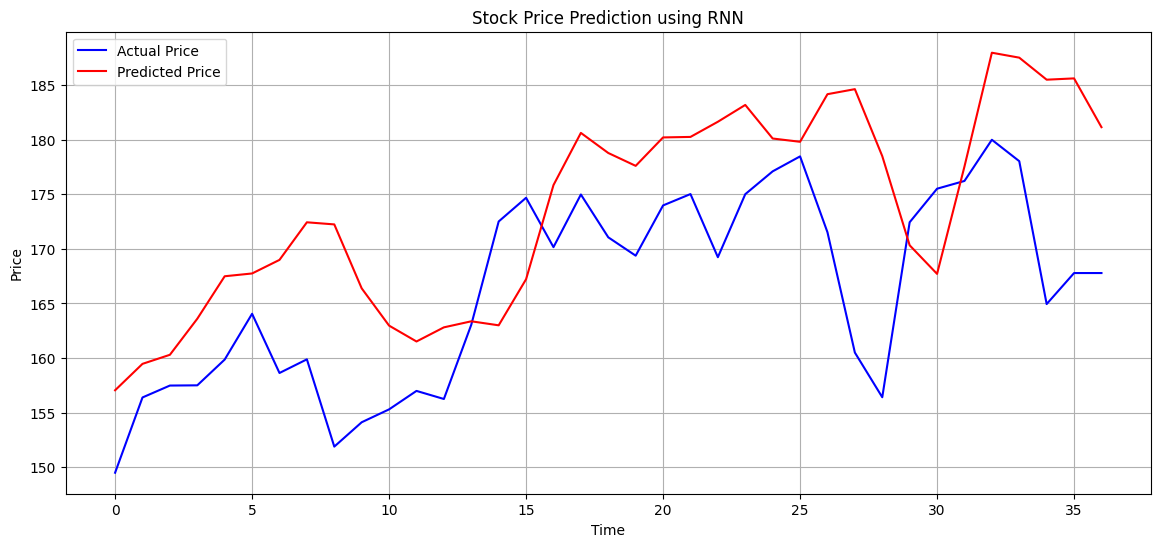

Predicted: 157.05, Actual: 149.50
Predicted: 159.47, Actual: 156.39
Predicted: 160.30, Actual: 157.48
Predicted: 163.60, Actual: 157.50
Predicted: 167.49, Actual: 159.86


In [7]:
# 6. Predict
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# 7. Plot Predictions
plt.figure(figsize=(14, 6))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 8. Print a few predictions
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test_actual[i][0]:.2f}")